In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify=iris.target,
                                                    random_state=7,
                                                    test_size=0.3)

print(x_train.shape, y_test.shape)

(105, 4) (45,)


In [ ]:
# 스케일 처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)
print(x_train[:3])
print(x_test_zs[:3])

[[5.4 3.  4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [7.7 2.8 6.7 2. ]]
[[-0.92241584 -1.27829732 -0.44337506 -0.13696313]
 [ 0.24449576 -0.60494672  0.10887146  0.11984274]
 [ 0.94464272 -1.27829732  1.10291519  0.76185739]]


In [ ]:
# SVC 서포트 벡터 머신
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris_svc = SVC()
iris_svc.fit(x_train_zs, y_train) # 주의! 스케일링 한거로 학습시키기
pred = iris_svc.predict(x_test_zs)

print(accuracy_score(y_test, pred))

0.9555555555555556


In [ ]:
pram_grid = [
    {'kernel': ['linear', 'poly', 'rbf'],
     'gamma': [1, 10, 100],
     'C': [0.01, 1, 100]}
]

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

bc = load_breast_cancer()
scaler = StandardScaler()
bc_zs = scaler.fit_transform(bc.data)

param_grid = [
    {
        'kernel': ['linear', 'poly', 'rbf'],  # 사용할 커널 함수 종류: 선형(linear), 다항식(poly), RBF(기본적으로 많이 사용)
        'gamma': [1, 10, 100],                # 커널 함수에서 데이터의 영향력을 결정하는 값 (주로 'rbf'나 'poly' 커널에서 사용)
        'C': [0.01, 1, 100]                   # 규제(regularization) 파라미터: 오차에 얼마나 민감하게 반응할지 결정
    }
]

svc_model = SVC()
grid_m = GridSearchCV(svc_model, param_grid, cv=5, return_train_score=True, verbose=3)

grid_m.fit(bc_zs, bc.target)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END C=0.01, gamma=1, kernel=linear;, score=(train=0.974, test=0.974) total time=   0.0s
[CV 2/5] END C=0.01, gamma=1, kernel=linear;, score=(train=0.971, test=0.974) total time=   0.0s
[CV 3/5] END C=0.01, gamma=1, kernel=linear;, score=(train=0.971, test=0.947) total time=   0.0s
[CV 4/5] END C=0.01, gamma=1, kernel=linear;, score=(train=0.978, test=0.965) total time=   0.0s
[CV 5/5] END C=0.01, gamma=1, kernel=linear;, score=(train=0.976, test=0.982) total time=   0.0s
[CV 1/5] END C=0.01, gamma=1, kernel=poly;, score=(train=1.000, test=0.939) total time=   0.0s
[CV 2/5] END C=0.01, gamma=1, kernel=poly;, score=(train=0.998, test=0.921) total time=   0.0s
[CV 3/5] END C=0.01, gamma=1, kernel=poly;, score=(train=1.000, test=0.956) total time=   0.0s
[CV 4/5] END C=0.01, gamma=1, kernel=poly;, score=(train=1.000, test=0.939) total time=   0.0s
[CV 5/5] END C=0.01, gamma=1, kernel=poly;, score=(train=1.000, test=0.93

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 1, 100], 'gamma': [1, 10, 100],
                          'kernel': ['linear', 'poly', 'rbf']}],
             return_train_score=True, verbose=3)

In [ ]:
grid_m.best_params_, grid_m.best_score_

({'C': 1, 'gamma': 1, 'kernel': 'linear'}, np.float64(0.9701443875174661))

(array([[ 1.1687481 , -0.48110699],
       [-0.48883432,  0.85528057],
       [-0.14304365,  1.00550199],
       ...,
       [ 0.07644203,  0.22938389],
       [ 0.3238035 ,  0.98759703],
       [ 0.39292492,  0.94943869]]), array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

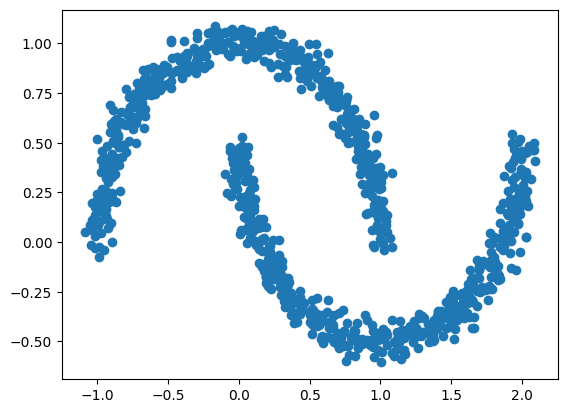

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

data = make_moons(1000, noise=0.05, random_state=7) # (데이터 포인트 갯수, 노이즈)
print(data)

data = data[0]
plt.scatter(data[:,0], data[:,1]) # x축 y축
plt.show()

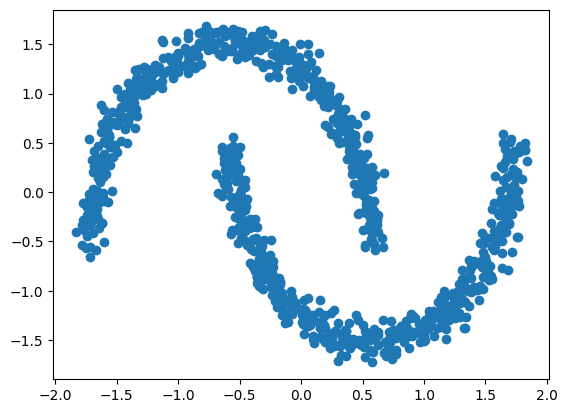

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
scaler = StandardScaler()
x_data = scaler.fit_transform(data)
plt.scatter(x_data[:,0], x_data[:,1])
plt.show()

[1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 0 1 0 1 1 0 1 1 0 1 0 1 

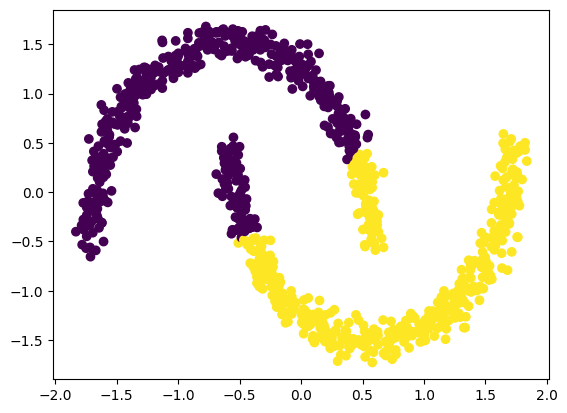

In [ ]:
# cluster KMeans K-평균 군집화(비지도 학습)
cluster = KMeans(n_clusters=2)
cluster.fit(x_data)
pred = cluster.predict(x_data)
print(pred)
plt.scatter(x_data[:,0], x_data[:,1],c=cluster.predict(x_data)) # color or cluster 의미
plt.show()

[ 0  1  1  0  1  1  0  1  1  1  1  1  0  0  0  1  1  1  0  0 -1  0  0  0
  0  0  1  1  0  0  0  1  0  1 -1  1  1  0  0  1  0  0  0  0  0  0  1  0
  0  1  0 -1  0  1  1  1  0  0  0  0  0  1  1  0  1  1  1  1  1 -1  0  0
  1  0  1  0  1  0  0  1  0  0  0  1  0  1  1  0  0  0  1  0  1  1  1  1
  0  0  1  0  1  1  0  0  1  1  0  1  0  0  0  0  0  0  0  1  1  0  0  1
  0 -1  1  1  0  0  0  1  0  1  0  0  1  0  1  1  0  1  0  0  0  1  0  0
  0  1  0  1  1  0  1  0  0  0  0  2  0  1  0  0  0  1  0  1  1  0  0  1
  0  1  1  1  1  1  1  1  1 -1  0  0  0  0  1  1  0  0  1  0  0  0  1  1
  0  1  1  1  1  0  0  1  0  1  1  1 -1  1  0  0  0  0  0  0  1  1  1  0
  0  1  1  0  0  0 -1  0  1  1  1  1  1  0  1  1  1  0  0  1  1  1  0  0
  0  1  0  0  1  0  1  1  1  0  0 -1  1  0  1  1  0  1  0  1  1  0  0  1
  1  0  1  1  1  0  0  1  0  0  0  1  0  0  0  0  0  0  1  0  1  0  1  2
  1  1  0  0  0  0  1  0  0  0  0  1  0  1  1  1  0  1  1  1  1  0  0  0
  1  0  0  1  0  0  0  0  0  1  1  1  1  0  0  1  0

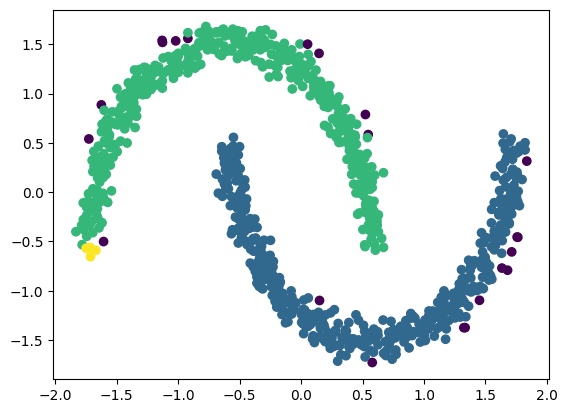

In [ ]:
# cluster DBSCAN 밀도 기반 클러스터링
cluster = DBSCAN(eps=0.1) # eps=0.1 클러스터의 반경, min_samples=30 반경 샘플의 수
pred = cluster.fit_predict(x_data) # DBSCAN는 fit, predict 단계가 나눠져 있지 않음
print(pred) # -1이 노이즈
plt.scatter(x_data[:,0], x_data[:,1],c=cluster.fit_predict(x_data))
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


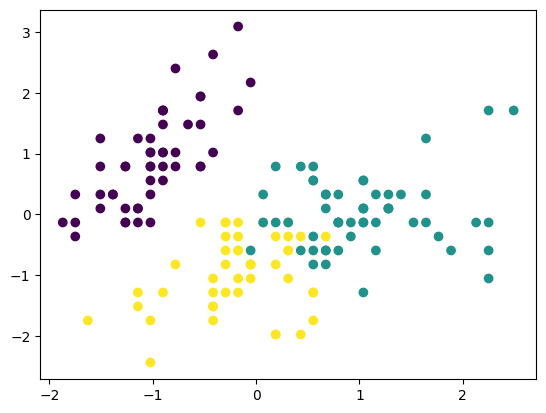

In [ ]:
# KMeans의 k값 3으로 주고 출력해보기
iris = load_iris()
data = iris.data

scaler = StandardScaler()
x_data = scaler.fit_transform(data)

cluster = KMeans(n_clusters=3, random_state=7)
cluster.fit(x_data)
pred = cluster.predict(x_data)
print(pred)
plt.scatter(x_data[:,0], x_data[:,1],c=cluster.predict(x_data)) # 꽃받침 길이/너비를 기준으로 3개의 클러스터로 나눈 결과를 시각화 한 것
plt.show()

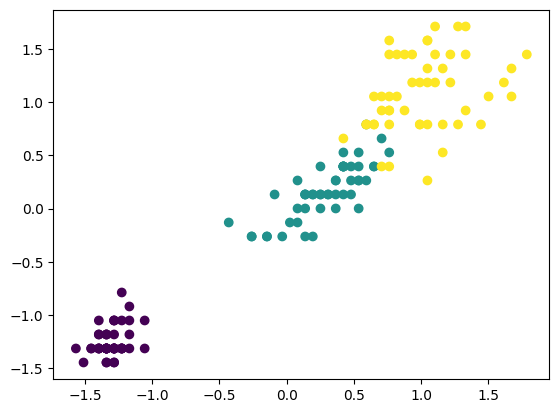

In [ ]:
# 강사님 풀이
scaler = StandardScaler()
iris_zs = scaler.fit_transform(iris.data)
plt.scatter(iris_zs[:,2], iris_zs[:,3], c=iris.target) # 꽃잎 길이 / 너비를 기준으로, 3개의 클러스터로 나눈 결과를 시각화한 것
plt.show()

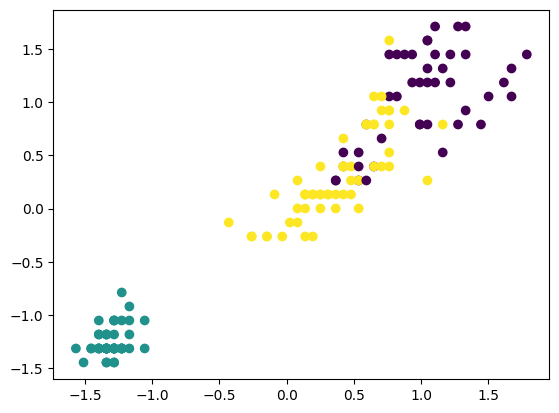

In [ ]:
# KMeans: 3개 군집 중심을 기준으로 데이터 분할
cluster = KMeans(3)
pred = cluster.fit_predict(iris_zs)
plt.scatter(iris_zs[:,2], iris_zs[:,3], c=pred)
plt.show()

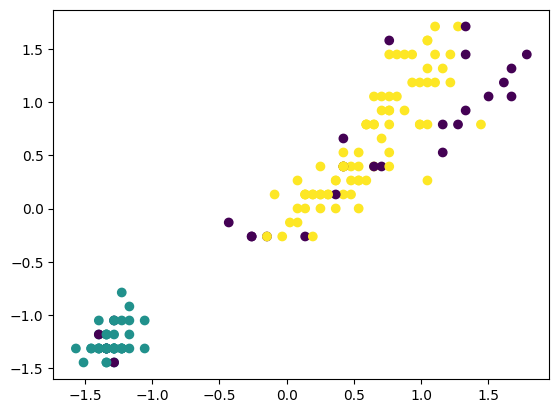

In [ ]:
# DBSCAN: 밀도 기반으로 군집 형성 (이웃 거리 eps=0.7)
cluster = DBSCAN(eps=0.7) # default eps=0.5
pred = cluster.fit_predict(iris_zs)
plt.scatter(iris_zs[:,2], iris_zs[:,3], c=pred)
plt.show()

(569, 30)
(569, 2)


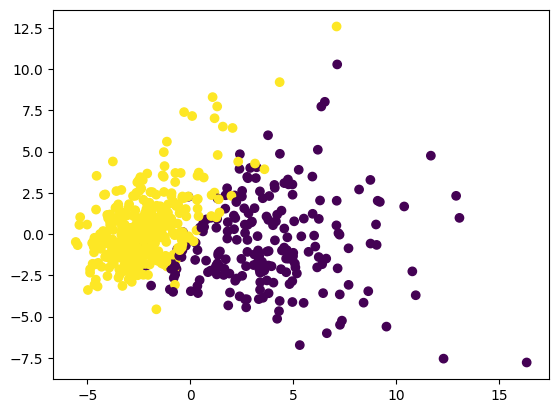

In [ ]:
# pca 차원축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 축 2개 가로세로
bc_pca = pca.fit_transform(bc_zs)
print(bc_zs.shape)
print(bc_pca.shape)
plt.scatter(bc_pca[:,0], bc_pca[:,1], c=bc.target)
plt.show()